In [36]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
import datetime
import scipy.stats
#imports downloader
#from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json
#s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


In [37]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA")) 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [38]:
datestring = '201306'
getCitiBikeCSV(datestring)

file in place, you can continue


In [39]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,695,2013-06-01 00:00:01,2013-06-01 00:11:36,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,19678,Subscriber,1983.0,1
1,693,2013-06-01 00:00:08,2013-06-01 00:11:41,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,16649,Subscriber,1984.0,1
2,2059,2013-06-01 00:00:44,2013-06-01 00:35:03,406,Hicks St & Montague St,40.695128,-73.995951,406.0,Hicks St & Montague St,40.695128,-73.995951,19599,Customer,NaN,0
3,123,2013-06-01 00:01:04,2013-06-01 00:03:07,475,E 15 St & Irving Pl,40.735243,-73.987586,262.0,Washington Park,40.691782,-73.973730,16352,Subscriber,1960.0,1
4,1521,2013-06-01 00:01:22,2013-06-01 00:26:43,2008,Little West St & 1 Pl,40.705693,-74.016777,310.0,State St & Smith St,40.689269,-73.989129,15567,Subscriber,1983.0,1


In [40]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,695,2013-06-01 00:00:01,2013-06-01 00:11:36,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,19678,Subscriber,1983.0,1,2013-06-01 00:00:01
1,693,2013-06-01 00:00:08,2013-06-01 00:11:41,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,16649,Subscriber,1984.0,1,2013-06-01 00:00:08
2,2059,2013-06-01 00:00:44,2013-06-01 00:35:03,406,Hicks St & Montague St,40.695128,-73.995951,406.0,Hicks St & Montague St,40.695128,-73.995951,19599,Customer,NaN,0,2013-06-01 00:00:44
3,123,2013-06-01 00:01:04,2013-06-01 00:03:07,475,E 15 St & Irving Pl,40.735243,-73.987586,262.0,Washington Park,40.691782,-73.973730,16352,Subscriber,1960.0,1,2013-06-01 00:01:04
4,1521,2013-06-01 00:01:22,2013-06-01 00:26:43,2008,Little West St & 1 Pl,40.705693,-74.016777,310.0,State St & Smith St,40.689269,-73.989129,15567,Subscriber,1983.0,1,2013-06-01 00:01:22


In [41]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

**$H_0$: there is no statistical difference in the trip duration distribution of daytime and nighttime riders**
$$ \alpha = 0.05 $$

$H_0$: $P_0$ - $P_1$ = 0

where $P_0$ is daytime trip duration and $P_1$ is nighttime trip duration

In [42]:
df['date'] = pd.to_datetime(df['starttime'])
df_day = df[df['date'].dt.strftime('%H:%M:%S').between('06:01:00','18:00:00')]
df_night = df[df['date'].dt.strftime('%H:%M:%S').between('18:01:00','23:59:59')]
df_night2 = df[df['date'].dt.strftime('%H:%M:%S').between('00:00:00','06:00:00')]
df_night.append(df_night2)
df_night

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
5853,498,2013-06-01 18:01:00,2013-06-01 18:09:18,301,E 2 St & Avenue B,40.722174,-73.983688,310.0,State St & Smith St,40.689269,-73.989129,14909,Subscriber,1964.0,1,2013-06-01 18:01:00
5854,436,2013-06-01 18:01:14,2013-06-01 18:08:30,216,Columbia Heights & Cranberry St,40.700379,-73.995481,233.0,Cadman Plaza W & Pierrepont St,40.694757,-73.990527,15732,Subscriber,1965.0,2,2013-06-01 18:01:14
5855,200,2013-06-01 18:01:17,2013-06-01 18:04:37,444,Broadway & W 24 St,40.742354,-73.989151,402.0,Broadway & E 22 St,40.740343,-73.989551,20232,Customer,NaN,0,2013-06-01 18:01:17
5856,1534,2013-06-01 18:01:26,2013-06-01 18:27:00,499,Broadway & W 60 St,40.769155,-73.981918,353.0,S Portland Ave & Hanson Pl,40.685396,-73.974315,19959,Subscriber,1967.0,1,2013-06-01 18:01:26
5857,287,2013-06-01 18:01:26,2013-06-01 18:06:13,482,W 15 St & 7 Ave,40.739355,-73.999318,453.0,W 22 St & 8 Ave,40.744751,-73.999154,17518,Customer,NaN,0,2013-06-01 18:01:26
5858,397,2013-06-01 18:01:45,2013-06-01 18:08:22,216,Columbia Heights & Cranberry St,40.700379,-73.995481,233.0,Cadman Plaza W & Pierrepont St,40.694757,-73.990527,15091,Subscriber,1961.0,1,2013-06-01 18:01:45
5859,102,2013-06-01 18:01:46,2013-06-01 18:03:28,402,Broadway & E 22 St,40.740343,-73.989551,402.0,Broadway & E 22 St,40.740343,-73.989551,19545,Subscriber,1988.0,2,2013-06-01 18:01:46
5860,458,2013-06-01 18:01:52,2013-06-01 18:09:30,72,W 52 St & 11 Ave,40.767272,-73.993929,500.0,Broadway & W 51 St,40.762288,-73.983362,18372,Customer,NaN,0,2013-06-01 18:01:52
5861,721,2013-06-01 18:02:02,2013-06-01 18:14:03,120,Lexington Ave & Classon Ave,40.686768,-73.959282,310.0,State St & Smith St,40.689269,-73.989129,18702,Subscriber,1970.0,1,2013-06-01 18:02:02
5862,446,2013-06-01 18:01:57,2013-06-01 18:09:23,3019,NYCBS Depot - DEL,40.716633,-73.981933,500.0,Broadway & W 51 St,40.762288,-73.983362,16780,Customer,NaN,0,2013-06-01 18:01:57


In [43]:
df_day.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype', 'birth year', 'gender'], axis=1, inplace=True)
df_day.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,tripduration,date
390,1474,2013-06-01 06:01:00
391,824,2013-06-01 06:02:17
392,388,2013-06-01 06:06:53
393,743,2013-06-01 06:10:00
394,2690,2013-06-01 06:10:25


In [44]:
df_night.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype', 'birth year', 'gender'], axis=1, inplace=True)
df_night.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,tripduration,date
5853,498,2013-06-01 18:01:00
5854,436,2013-06-01 18:01:14
5855,200,2013-06-01 18:01:17
5856,1534,2013-06-01 18:01:26
5857,287,2013-06-01 18:01:26


In [45]:
df_night.tail()

,tripduration,date
577697,81724,2013-06-30 23:59:18
577698,925,2013-06-30 23:59:27
577699,279,2013-06-30 23:59:36
577700,161,2013-06-30 23:59:33
577701,909,2013-06-30 23:59:47


In [46]:
df_day.describe()

,tripduration
count,3.783170e+05
mean,1.349092e+03
std,7.769724e+03
min,6.100000e+01
25%,5.110000e+02
50%,8.670000e+02
75%,1.403000e+03
max,2.742506e+06


In [47]:
df_night.describe()

,tripduration
count,1.788690e+05
mean,1.395850e+03
std,6.996149e+03
min,6.100000e+01
25%,5.240000e+02
50%,8.910000e+02
75%,1.394000e+03
max,1.239509e+06


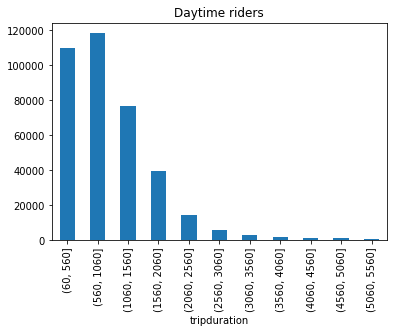

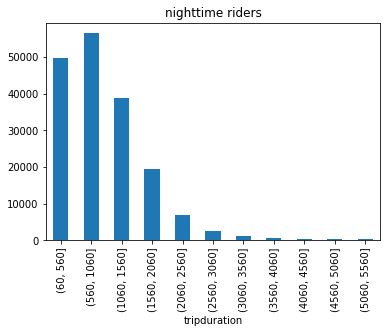

In [48]:
bins = np.arange(60, 6060, 500)
axM = df_day.tripduration.groupby(pd.cut(df_day.tripduration, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("Daytime riders")
axF = df_night.tripduration.groupby(pd.cut(df_night.tripduration, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("nighttime riders");

**Figure 1: histogrammed distribution of riders' trip duration in seconds by day/night riders **
Most of the rider's trip durations for both are concentrated between 560 and 1060. The higher the vertical value, the more riders who has ridden that duration.

              count_nonzero
tripduration               
(60, 560]          0.012990
(560, 1060]        0.011084
(1060, 1560]       0.003186
(1560, 2060]       0.006965
(2060, 2560]       0.007323
(2560, 3060]       0.005565
(3060, 3560]       0.004312
(3560, 4060]       0.002880
(4060, 4560]       0.001867
(4560, 5060]       0.000788
(5060, 5560]       0.000000


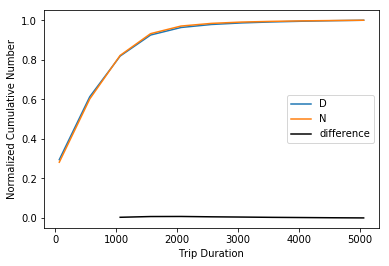

In [49]:
csD=df_day.tripduration.groupby(pd.cut(df_day.tripduration, bins)).agg([count_nonzero]).cumsum()

csN=df_night.tripduration.groupby(pd.cut(df_night.tripduration, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csD / csD.max()-csN / csN.max()))

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "D")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "N")
pl.plot(bins[:-1] + 5, np.sqrt(csN / csN.max() - csD / csD.max())**2, 'k-',
        label = "difference")
pl.xlabel("Trip Duration")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 2: the cumulative distribution of CitiBike riders' trip duration by Day/ Night**
There doesn't seem to be so much of a difference, as it sits around zero. There are very subtle differences between D and N if you look closely.

# KS tests to compare 2 samples

In [50]:
ks = scipy.stats.ks_2samp(df_day.tripduration, df_night.tripduration)
print (ks)

Ks_2sampResult(statistic=0.017167335563661956, pvalue=1.5497687901461508e-31)


your words here!...
this cell is for you to tell me what the scipy KS test returned and what it means in terms of NULL HYPOTHESIS
to do that refer to the scipy documentation to understand the output of the scipy.stats.ks_2samp function

This function computes the Kolmogorov-Smirnov statistic on 2 samples, and return a KS statistic and a P-value. 
This tests whether 2 samples are drawn from the same distribution, assuming the distribution is continuous.
It is a two-sided test. It is non-parametric.
If the KS statistic is small or the p-value is very high, 
then we cannot reject the null hypothesis that the distributions of the two samples are the same.
For a alpha of 0.05, the Statistic has to be over 1.36 and the p-value less than 0.05.
The statistic here is 0.01717 and the pvalue is 1.5497x10 to -31.
The pvalue is very low enough to reject the null hypothesis, if tested at 0.05.
However, the KS statistic is 0.01717, which is not higher than the critical value test at 0.05 of 1.36.
Therefore, we cannot reject the null hypothesis that there is no statistical difference in the trip duration distribution of daytime and nighttime riders.

In [62]:
df_night.size

357738

In [63]:
select_indices = np.random.choice(df_day.index, 378117, replace=False)
df_subsetD = df_day.drop(select_indices)
select_indices = np.random.choice(df_night.index, 178669, replace=False)
df_subsetN = df_night.drop(select_indices)
ks = scipy.stats.ks_2samp(df_subsetD.tripduration, df_subsetN.tripduration)
print (ks)

Ks_2sampResult(statistic=0.059999999999999998, pvalue=0.85370713521650221)


your words here!...
this cell is for you to redo the test with reducted dataset 
and tell me what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS

Reducing it to 200 rides, selecting randomly without replacement, One result the KS statistic changed to 0.0599 and the p-value to 0.8537.
With a smaller selected sample, the statistic increased and the p-value increased relative to the full dataset. 
If the KS statistic is small or the p-value is very high, 
then we cannot reject the null hypothesis that the distributions of the two samples are the same.
So if the KS statistic increased and the p-value increased,
We can't assume it will be closer to rejecting or failing to reject the null hypothesis in comparison to the previous test.

Since the p-value is over 0.05 and the KS-statistic is less than the critical value of 1.36, we failed to reject the null hypothesis that there is no statistical difference in the trip duration distribution of daytime and nighttime riders.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)

In [75]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis

select_indices = np.random.choice(df_day.index, 378117, replace=False)
df_subsetD = df_day.drop(select_indices)
df_subsetDCopy = df_subsetD.tripduration.copy()
df_subsetDCopy.sort()
select_indices = np.random.choice(df_night.index, 178669, replace=False)
df_subsetN = df_night.drop(select_indices)
df_subsetNCopy = df_subsetN.tripduration.copy()
df_subsetNCopy.sort()
ks = scipy.stats.pearsonr(df_subsetDCopy, df_subsetNCopy)
print(ks)

(0.93165815871011659, 5.3033557595600185e-89)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:13: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


The coefficient of pearson states that if it's close to 1, it's correlated. If it's close to 0, it's uncorrelated.
but if it's close to -1, then it's anti-correlated.

In this case, the coefficient of pearson is 0.9316, 0.07 away from 1. But because it's correlated, it supports our null hypothesis that there is no statistical difference in trip duration. Regardless, the p-value is less than 0.05 again being 5.3033 x 10 to the -89. However, since it's very closely correlated, we failed to reject the null hypothesis that there is no statistical difference in the trip duration distribution of daytime and nighttime riders. (If we are testing it with a control in the null hypothesis, and this null being the alternative hypothesis, then this might be significant.)

# Spearman's  test for correlation

In [78]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis

select_indices = np.random.choice(df_day.index, 378117, replace=False)
df_subsetD = df_day.drop(select_indices)
df_subsetDCopy = df_subsetD.tripduration.copy()
df_subsetDCopy.sort()
select_indices = np.random.choice(df_night.index, 178669, replace=False)
df_subsetN = df_night.drop(select_indices)
df_subsetNCopy = df_subsetN.tripduration.copy()
df_subsetNCopy.sort()

scipy.stats.spearmanr(df_subsetDCopy, df_subsetNCopy)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:12: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


SpearmanrResult(correlation=0.99999474984230774, pvalue=0.0)

Correlations of -1 or +1 imply an exact monotonic relationship. 
Positive correlations imply that as x increases, so does y. 
Negative correlations imply that as x increases, y decreases.
Correlation with 0 is no correlation. 
Therefore, if testing at 0.05, we failed to reject the null hypothesis, as the correlation is almost 1 despite the p-value is extremely small, far less than 0.05, as we are still testing the null hypothesis that there is no significant difference in trip duration between day and night time riders. (If we are testing it with a control in the null hypothesis, and this null being the alternative hypothesis, then this might be significant.)